In [76]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [77]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [78]:
df = pd.read_csv('train.csv.zip')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1004085,P00075742,F,26-35,6,A,1,0,8,14.0,NaN,7803
1,1005491,P00234842,M,18-25,7,A,1,0,5,6.0,16.0,6903
2,1003499,P00220142,M,26-35,3,A,2,0,1,15.0,NaN,15773
3,1000097,P00211242,F,36-45,3,C,3,0,8,12.0,NaN,8116
4,1005802,P00327142,F,26-35,0,A,4+,0,8,15.0,NaN,6144


**Data fields:**
   - User_ID - идентификационный номер покупателя
   - Product_ID - идентификационный номер товара
   - Age - возраст покупателя
   - Occupation - род деятельности покупателя
   - City_Category - город проживания
   - Stay_In_Current_City_Years - как долго покупатель живет в этом городе
   - Marital_Status - семейное положение покупателя
   - Product_Category_1 - категория товара 1
   - Product_Category_2 - категория товара 2
   - Product_Category_3 - категория товара 3
   - Purchase - сумма покупок

1. Построить график распределения целевой переменной. Сделать выводы.

In [79]:
label_font = {
    "fontsize": 12,
    "family": "serif",
    "fontweight":"bold"
}

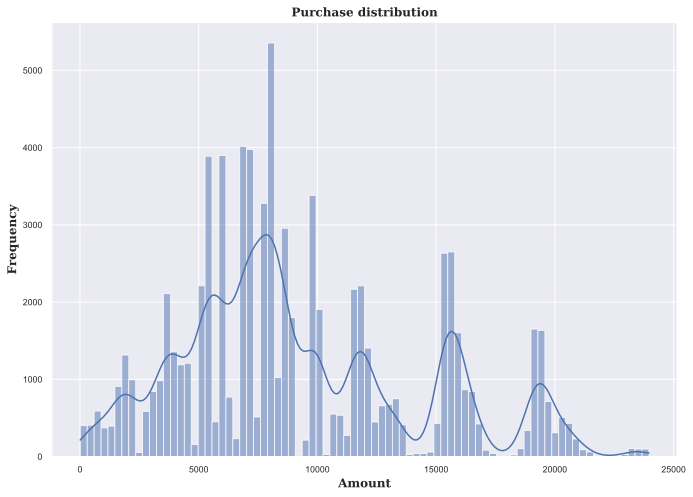

In [80]:
plt.figure(figsize=(10,8))
sns.set(font_scale=0.8, style='darkgrid')
sns.histplot(df['Purchase'], kde=True)
plt.title('Purchase distribution', fontdict=label_font)
plt.ylabel('Frequency', fontdict=label_font)
plt.xlabel('Amount', fontdict=label_font)
plt.show()

Распределение не похоже ни на одно из стандартных распределений. Сильно отличается от нормального распределения. Мода явно видна, однако присутствует много локальных пиков, что придает распределению зубчатый вид.

2. Построить гистограммы для наиболее проблемных признаков (используйте выводы из первого ДЗ). Сделайте по ним выводы.

Каких-то проблемных признаков в смысле неадекватных значений мне выявить не удалось, потому что все они кроме целевой переменной по факту являются категориальными признаками.

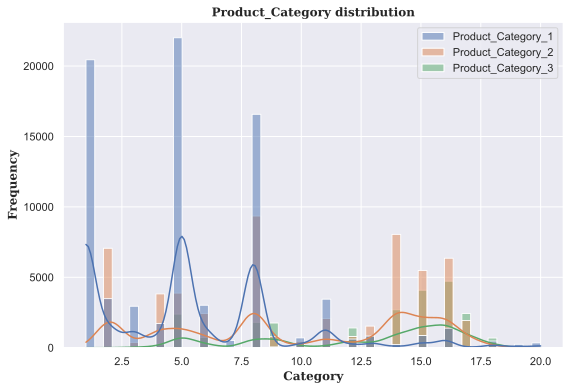

In [112]:
plt.figure(figsize=(8,6))
sns.histplot(df[['Product_Category_1', 'Product_Category_2', 'Product_Category_3']], 
            alpha=0.5, kde=True)
plt.title('Product_Category distribution', fontdict=label_font)
plt.ylabel('Frequency', fontdict=label_font)
plt.xlabel('Category', fontdict=label_font)
plt.show()

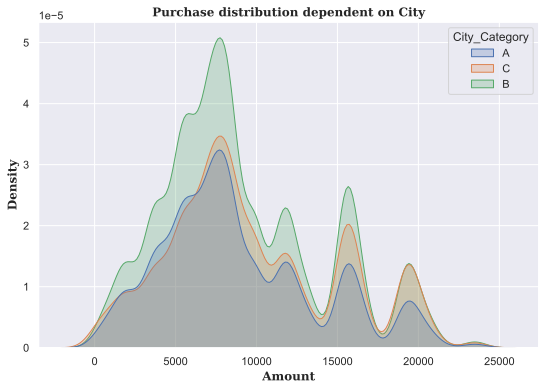

In [125]:
plt.figure(figsize=(8,6))
sns.kdeplot(df['Purchase'], shade=True, hue=df['City_Category'])
plt.title('Purchase distribution dependent on City', fontdict=label_font)
plt.ylabel('Density', fontdict=label_font)
plt.xlabel('Amount', fontdict=label_font)
plt.show()

3. Построить матрицу корреляций признаков и целевой переменной. Сделайте выводы.

Теоретически это можно сделать, однако практического смысла в данном случае будет немного, так как ранее мы выяснили, что даже признаки, представленные числами, по факту являются категориальными признаками.

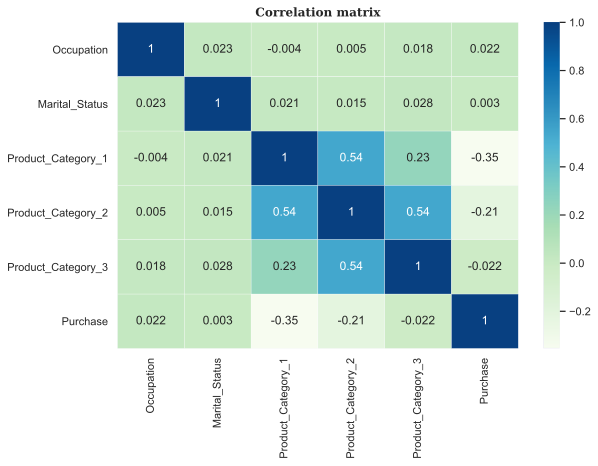

In [85]:
plt.figure(figsize=(8,6))
sns.set(font_scale=1)
sns.heatmap(df[['Occupation', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3',
                'Purchase']].corr().round(3), annot=True, linewidths=.3, cmap='GnBu')
plt.title('Correlation matrix', fontdict=label_font)
plt.show()